**Socio-Economic of Indonesia in 2021**

Data source: https://www.kaggle.com/datasets/dannytheodore/socio-economic-of-indonesia-in-2021

**STAGE 1**

This project analyzes data of several of Indonesia's socio-economic measure for the year of 2021. The information in  data set was collected from several reports from Indonesia's National Statistics Bureau (BPS). This dataset shows provinces, cities, number of poor people, regional GDP and etc

1. Provinces (province): name of the province (type: object, categorical nominal)
 2. Cities/Regencies (cities_reg): name of the city (type: object, categorical nominal) 
 3. Percentage of Poor People (poorpeople_percentage): percentage of the people who suffer from poverty (type: float, numeric continuous) 
 4. Regional GDP (reg_gdp): amount of money as GDP in 2021 (in billion rupiah) (type: float, numeric continuous)
 5. Life Expectancy (life_exp): average expectancy of life in years (type: float, numeric continuous)
 6. Average School Time (avg_schooltime): time spending in school (type: float, numeric continuous)
 7. Expenses per Capita (exp_percap): amount of expenses in thousand rupiah per year (type: int, numeric descrete)

**STAGE 2. Part 1**

In [2]:
import pandas as pd
df = pd.read_csv('Downloads/archive (6)/2021socio_economic_indonesia.csv')
df.head()  

,province,cities_reg,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap
0,Aceh,Simeulue,18.98,2.275,65.240,9.48,7148
1,Aceh,Aceh Singkil,20.36,2.425,67.355,8.68,8776
2,Aceh,Aceh Selatan,13.18,5.531,64.360,8.88,8180
3,Aceh,Aceh Tenggara,13.41,5.063,68.155,9.67,8030
4,Aceh,Aceh Timur,14.45,10.616,68.705,8.21,8577


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   province               514 non-null    object 
 1   cities_reg             514 non-null    object 
 2   poorpeople_percentage  514 non-null    float64
 3   reg_gdp                514 non-null    float64
 4   life_exp               514 non-null    float64
 5   avg_schooltime         514 non-null    float64
 6   exp_percap             514 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 28.2+ KB


**STAGE 2. Part 2**

In [4]:
df[(df['poorpeople_percentage'] < 10) & (df['avg_schooltime'] > 11.00)]['exp_percap'].min()

10754

* Conclusion: Regions where the percentage of poverty is less than 10% and the time spent in school is more than 11 years, per capita spending from 10,754 thousand rupiah per year

In [5]:
df[(df['life_exp'] > 70) & (df['province'] == 'Bali')]

,province,cities_reg,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap
273,Bali,Jembrana,5.06,13.465,72.400,8.35,11675
274,Bali,Tabanan,5.12,22.331,73.685,9.14,14326
275,Bali,Badung,2.62,49.215,75.060,10.62,17327
276,Bali,Gianyar,4.85,25.915,73.715,9.29,14391
277,Bali,Klungkung,5.64,8.468,71.355,8.14,11287
278,Bali,Bangli,5.09,6.722,70.570,7.18,11201
279,Bali,Karang Asem,6.78,16.453,70.500,6.33,10175
280,Bali,Buleleng,6.12,33.359,71.895,7.25,13362
281,Bali,Kota Denpasar,2.96,49.583,74.880,11.48,19598


* Conclusion: The percentage of poverty in Bali regions where life expectancy is over 70 years is less than 6.78%

In [6]:
df[df['avg_schooltime'] <= 6]['province'].value_counts()

province
Papua             16
Jawa Timur         4
Papua Barat        2
Sumatera Utara     1
Name: count, dtype: int64

* Conclusion: Most of the regions where the duration of education was less than 6 years are located in the province of Papua (16 times)

In [7]:
df[df['exp_percap'] >= 20000]['life_exp'].mean()

73.94

* Conclusion: The average life expectancy of people in regions where per capita expenditures amount to more than 20,000 thousand rupiah per year is 73.94 years

In [8]:
df[df['reg_gdp'] <= df['reg_gdp'].median()]['poorpeople_percentage'].min()

2.38

* Conclusion: The minimum percentage of poverty in regions where GDP is less than the median value is 2.38%

**STAGE 2. Part 3**

In [9]:
df['poorpeople_percentage'].sort_values(ascending=False)

511    41.66
512    40.59
506    38.73
503    37.91
497    37.64
       ...  
142     2.75
275     2.62
183     2.58
272     2.57
70      2.38
Name: poorpeople_percentage, Length: 514, dtype: float64

* Conclusion: The poverty rate of more than 40% is observed in 2 cities

In [10]:
df.sort_values('avg_schooltime', ascending=False)

,province,cities_reg,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap
18,Aceh,Kota Banda Aceh,7.61,18.288,71.470,12.83,16891
437,Sulawesi Tenggara,Kota Kendari,4.87,22.046,73.835,12.51,14356
460,Maluku,Kota Ambon,5.02,14.707,70.580,12.20,14148
85,Riau,Kota Pekanbaru,2.83,115.519,72.385,11.92,14360
272,Banten,Kota Tangerang Selatan,2.57,82.551,72.430,11.82,15751
...,...,...,...,...,...,...,...
511,Papua,Intan Jaya,41.66,1.274,65.580,3.09,5328
498,Papua,Pegunungan Bintang,30.46,1.969,64.415,3.04,5429
508,Papua,Yalimo,33.25,1.286,65.385,3.01,4664
509,Papua,Puncak,36.26,1.438,66.060,2.16,5412


* Conclusion: In a region with a maximum duration of education, per capita expenditure is 4.25 times higher than with a minimum education

In [11]:
df.sort_values('reg_gdp')

,province,cities_reg,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap
503,Papua,Supiori,37.91,1.042,66.055,8.87,5708
307,Nusa Tenggara Timur,Sumba Tengah,34.27,1.196,68.380,6.47,6061
38,Sumatera Utara,Pakpak Bharat,9.35,1.211,65.890,9.14,8254
507,Papua,Mamberamo Tengah,36.76,1.215,63.750,3.33,4487
505,Papua,Nduga,37.18,1.271,55.370,1.42,3976
...,...,...,...,...,...,...,...
263,Jawa Timur,Kota Surabaya,5.23,554.509,74.120,10.50,17862
155,DKI Jakarta,Kota Jakarta Selatan,3.56,644.572,74.225,11.64,23888
157,DKI Jakarta,Kota Jakarta Pusat,4.94,701.980,74.150,11.39,17365
481,Papua Barat,Maybrat,31.39,732.000,65.240,6.96,5245


* Conclusion: Supiori - the regency with the lowest GDP (1.042 million rupiah)

**STAGE 2. Part 4**

In [12]:
df['province'].value_counts()

province
Jawa Timur                   38
Jawa Tengah                  35
Sumatera Utara               33
Papua                        29
Jawa Barat                   27
Sulawesi Selatan             24
Aceh                         23
Nusa Tenggara Timur          22
Sumatera Barat               19
Sulawesi Tenggara            17
Sumatera Selatan             17
Lampung                      15
Sulawesi Utara               15
Kalimantan Barat             14
Kalimantan Tengah            14
Sulawesi Tengah              13
Papua Barat                  13
Kalimantan Selatan           13
Riau                         12
Jambi                        11
Maluku                       11
Bengkulu                     10
Maluku Utara                 10
Nusa Tenggara Barat          10
Kalimantan Timur             10
Bali                          9
Banten                        8
Kepulauan Riau                7
Kepulauan Bangka Belitung     7
DKI Jakarta                   6
Gorontalo                     6

* Conclusion: Jawa Timur - the most common province

<Axes: >

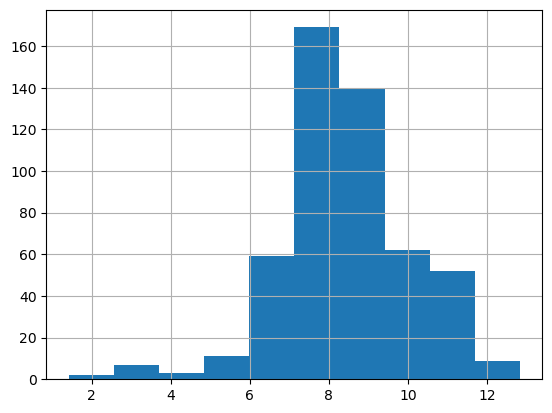

In [13]:
df['avg_schooltime'].hist() 

* Conclusion: The most frequent duration of education is in the range from 7 to 8 years

<Axes: >

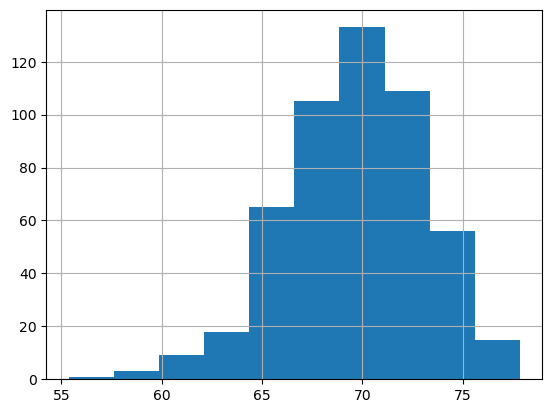

In [14]:
df['life_exp'].hist()

* Conclusion: Regions with a life expectancy from 55 to 60 are significantly less than regions with a value from 70 to 75

**STAGE 2. Part 5**

<Axes: >

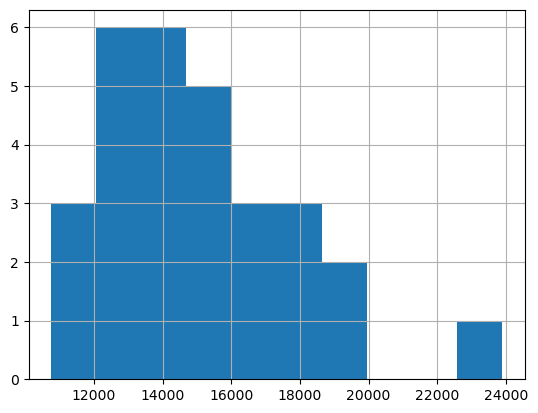

In [15]:
df[(df['poorpeople_percentage'] < 10) & (df['avg_schooltime'] > 11.00)]['exp_percap'].hist()

* Conclusion: The per capita expenditure of almost 24,000 thousand rupiah is found only in one region where the level of education is more than 11 years old and poverty is less than 10%

<Axes: >

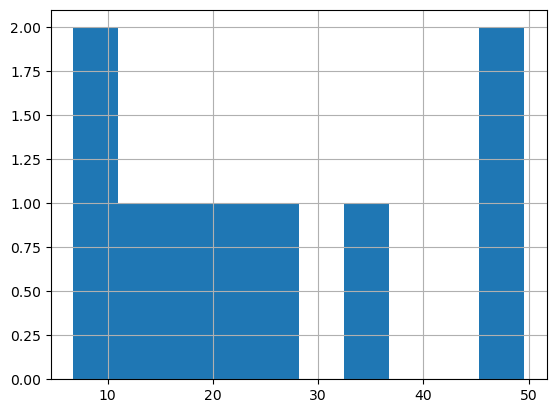

In [16]:
df[(df['life_exp'] > 70) & (df['province'] == 'Bali')]['reg_gdp'].hist()

* Conclusion: Bali has two regions with a life expectancy of more than 70 years, where the GRP almost reaches 50 million rupees

In [17]:
df[df['exp_percap'] >= 20000].groupby('province').value_counts()

province     cities_reg            poorpeople_percentage  reg_gdp  life_exp  avg_schooltime  exp_percap
DKI Jakarta  Kota Jakarta Barat    4.31                   469.918  73.655    10.78           20801         1
             Kota Jakarta Selatan  3.56                   644.572  74.225    11.64           23888         1
Name: count, dtype: int64

* Conclusion: DKI Jakarta - a province where per capita spending exceeds 20,000 thousand rupiah. From observations, there are 2 regions there

**STAGE 2. Part 6**

We have divided the percentage of poverty into three levels: low - up to 10% inclusive, medium - from 10% to 30% and high - above 30%

In [18]:
def poverty_status(x):
    if x <= 10.00:
        return 'low'
    if 10.00 < x < 30.00:
        return 'medium'
    if x >= 30.00:
        return 'high'

In [19]:
df['poverty_status'] = df['poorpeople_percentage'].apply(poverty_status)
df['poverty_status'].value_counts()

poverty_status
medium    256
low       238
high       20
Name: count, dtype: int64

* Conclusion: There are only 20 regions with high poverty status

Studying in Indonesia lasts 12 years (although there are two observations in the dataset where the duration of training is more than 12 years, perhaps some preparatory courses are included there): 6 years in elementary school, 3 years in middle school and 3 years in high school. We have added a new column with the average level of school education in the region: primary, secondary, high.

In [20]:
def edu_status(x):
    if x <= 6:
        return 'primary'
    if 6 < x <= 9:
        return 'secondary'
    if x > 9:
        return 'high'

In [21]:
df['edu_status'] = df['avg_schooltime'].apply(edu_status)
df['edu_status'].value_counts()

edu_status
secondary    334
high         157
primary       23
Name: count, dtype: int64

In [22]:
334 / 514

0.6498054474708171

* Conclusion: 65% of regions where the level of education is average (that is, it includes both primary and secondary)

**STAGE 3. Part 1**

In [23]:
df['life_exp'].mean()

69.61907587548639

* Conclusion: 69.6 years is the average life expectancy, which indicates that people live to old age

In [24]:
df['province'].mode()

0    Jawa Timur
Name: province, dtype: object

* Conclusion: Jawa Timur - the most common province

In [25]:
df['reg_gdp'].median()

13.0685

* Conclusion: 13.1 million rupees is the median income, 50% of the observed regions of Indonesia have a GDP below 13.1

In [26]:
df['reg_gdp'].mean()

34.798332684824906

* Conclusion: The average GDP is significantly higher than the median, most likely there are regions with extremely high GDP in the sample

In [27]:
df['exp_percap'].median()

10196.5

In [28]:
df['exp_percap'].mean()

10324.787937743191

* Conclusion: The mean and median are practically the same, which suggests that the distribution of data is almost symmetrical, but there are a couple of regions where per capita spending is high, because the mean is higher than the median

**STAGE 3. Part 2**

In [29]:
!pip3 install seaborn==0.13.0
import seaborn as sns

<Axes: xlabel='exp_percap'>

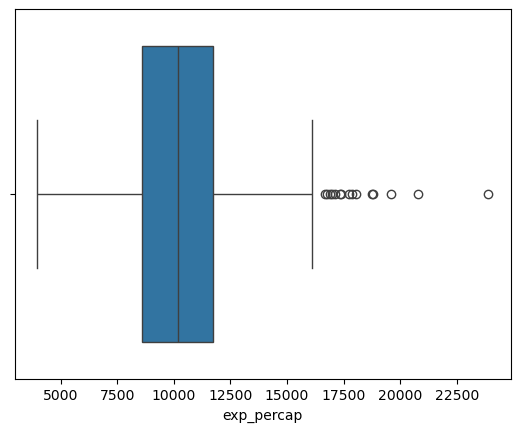

In [30]:
sns.boxplot(x=df['exp_percap'], data=df)

* Conclusion: In the per capita expenditure observation, there are outliers starting at about 16250

<Axes: xlabel='life_exp'>

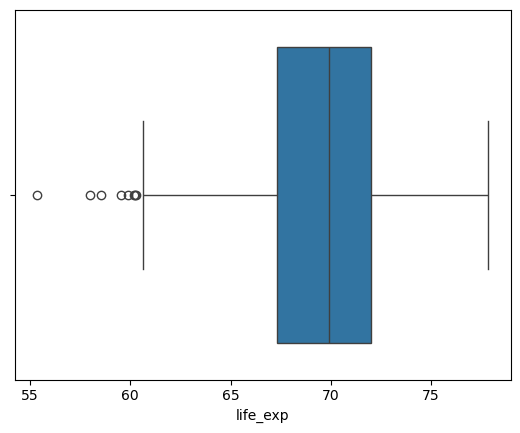

In [31]:
sns.boxplot(x=df['life_exp'], data=df)

* Conclusion: Data from 55 to 60 years (approximately) are considered outliers in the life expectancy column

<Axes: xlabel='avg_schooltime'>

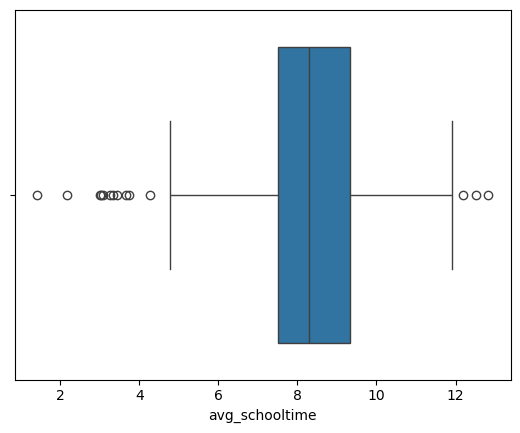

In [32]:
sns.boxplot(x=df['avg_schooltime'], data=df)

* Conclusion: In the education duration column, there are more emissions where education is low

**STAGE 3. Part 3**

The standard deviation method — we will consider outliers values that differ from the average by 2 standard deviations

In [33]:
low_std = df['avg_schooltime'].mean() - 2 * df['avg_schooltime'].std()
up_std = df['avg_schooltime'].mean() + 2 * df['avg_schooltime'].std()
low_std, up_std

(5.174931142103987, 11.698298429880449)

In [34]:
df[(df['avg_schooltime'] > low_std) & (df['avg_schooltime'] < up_std)]

,province,cities_reg,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap,poverty_status,edu_status
0,Aceh,Simeulue,18.98,2.275,65.240,9.48,7148,medium,high
1,Aceh,Aceh Singkil,20.36,2.425,67.355,8.68,8776,medium,secondary
2,Aceh,Aceh Selatan,13.18,5.531,64.360,8.88,8180,medium,secondary
3,Aceh,Aceh Tenggara,13.41,5.063,68.155,9.67,8030,medium,high
4,Aceh,Aceh Timur,14.45,10.616,68.705,8.21,8577,medium,secondary
...,...,...,...,...,...,...,...,...,...
501,Papua,Keerom,16.00,2.927,66.645,8.02,8926,medium,secondary
502,Papua,Waropen,29.85,2.047,66.410,9.21,6788,medium,high
503,Papua,Supiori,37.91,1.042,66.055,8.87,5708,high,secondary
504,Papua,Mamberamo Raya,28.78,1.725,57.990,5.87,4603,medium,primary


In [35]:
489 / 514

0.9513618677042801

* Conclusion: By the method of two standard deviations, the outliers were 5%

In [36]:
df['avg_schooltime'].describe()

count    514.000000
mean       8.436615
std        1.630842
min        1.420000
25%        7.510000
50%        8.305000
75%        9.337500
max       12.830000
Name: avg_schooltime, dtype: float64

In [37]:
iqr = 9.337500 - 7.510000
low_iqr = 7.510000 - 1.5 * iqr
up_iqr = 9.337500 + 1.5 * iqr
low_iqr, up_iqr

(4.768749999999999, 12.078750000000001)

In [38]:
df[(df['avg_schooltime'] > low_iqr) & (df['avg_schooltime'] < up_iqr)]

,province,cities_reg,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap,poverty_status,edu_status
0,Aceh,Simeulue,18.98,2.275,65.240,9.48,7148,medium,high
1,Aceh,Aceh Singkil,20.36,2.425,67.355,8.68,8776,medium,secondary
2,Aceh,Aceh Selatan,13.18,5.531,64.360,8.88,8180,medium,secondary
3,Aceh,Aceh Tenggara,13.41,5.063,68.155,9.67,8030,medium,high
4,Aceh,Aceh Timur,14.45,10.616,68.705,8.21,8577,medium,secondary
...,...,...,...,...,...,...,...,...,...
502,Papua,Waropen,29.85,2.047,66.410,9.21,6788,medium,high
503,Papua,Supiori,37.91,1.042,66.055,8.87,5708,high,secondary
504,Papua,Mamberamo Raya,28.78,1.725,57.990,5.87,4603,medium,primary
510,Papua,Dogiyai,28.81,1.356,65.845,4.94,5415,medium,primary


In [39]:
500 / 514

0.9727626459143969

* Conclusion: The outliers were 3%, which is less than the value obtained using the 2 standard deviation method

In [40]:
low_std_2 = df['exp_percap'].mean() - 2 * df['exp_percap'].std()
up_std_2 = df['exp_percap'].mean() + 2 * df['exp_percap'].std()
low_std_2, up_std_2

(4890.499566266373, 15759.076309220009)

In [41]:
df[(df['exp_percap'] > low_std_2) & (df['exp_percap'] < up_std_2)]

,province,cities_reg,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap,poverty_status,edu_status
0,Aceh,Simeulue,18.98,2.275,65.240,9.48,7148,medium,high
1,Aceh,Aceh Singkil,20.36,2.425,67.355,8.68,8776,medium,secondary
2,Aceh,Aceh Selatan,13.18,5.531,64.360,8.88,8180,medium,secondary
3,Aceh,Aceh Tenggara,13.41,5.063,68.155,9.67,8030,medium,high
4,Aceh,Aceh Timur,14.45,10.616,68.705,8.21,8577,medium,secondary
...,...,...,...,...,...,...,...,...,...
503,Papua,Supiori,37.91,1.042,66.055,8.87,5708,high,secondary
509,Papua,Puncak,36.26,1.438,66.060,2.16,5412,high,primary
510,Papua,Dogiyai,28.81,1.356,65.845,4.94,5415,medium,primary
511,Papua,Intan Jaya,41.66,1.274,65.580,3.09,5328,high,primary


In [42]:
488 / 514

0.9494163424124513

* Conclusion: In the per capita expenditure column, the emissions were 5% by 2 standard deviations

In [43]:
df['exp_percap'].describe()

count      514.000000
mean     10324.787938
std       2717.144186
min       3976.000000
25%       8574.000000
50%      10196.500000
75%      11719.000000
max      23888.000000
Name: exp_percap, dtype: float64

In [44]:
iqr_2 = 11719 - 8574
low_iqr_2 = 11719 - 1.5 * iqr_2
up_iqr_2 = 8574 + 1.5 * iqr_2
low_iqr_2, up_iqr_2

(7001.5, 13291.5)

In [45]:
df[(df['exp_percap'] > low_iqr_2) & (df['exp_percap'] < up_iqr_2)]

,province,cities_reg,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap,poverty_status,edu_status
0,Aceh,Simeulue,18.98,2.275,65.240,9.48,7148,medium,high
1,Aceh,Aceh Singkil,20.36,2.425,67.355,8.68,8776,medium,secondary
2,Aceh,Aceh Selatan,13.18,5.531,64.360,8.88,8180,medium,secondary
3,Aceh,Aceh Tenggara,13.41,5.063,68.155,9.67,8030,medium,high
4,Aceh,Aceh Timur,14.45,10.616,68.705,8.21,8577,medium,secondary
...,...,...,...,...,...,...,...,...,...
489,Papua,Kepulauan Yapen,26.09,4.159,69.070,9.47,7491,medium,high
490,Papua,Biak Numfor,24.45,5.232,68.205,10.34,9607,medium,high
493,Papua,Mimika,14.17,63.397,72.375,10.18,11400,medium,high
494,Papua,Boven Digoel,19.90,4.863,60.300,8.79,7864,medium,secondary


In [46]:
414 / 514

0.8054474708171206

* Conclusion: In the per capita expenditure column, outliers were almost 20%, which is significantly more than the value obtained by 2 standard deviations

**STAGE 3. Part 4**

For 'avg_schooltime' we chose the method of 2 standard deviations, for 'exp_percap' we chose the method of 1.5IQR

In [47]:
mean = df['avg_schooltime'].mean()
mean

8.436614785992218

In [48]:
def change_schooltime(x):
    if x < low_std or x > up_std:
        return 8.436614785992218
    else:
        return x

In [49]:
df['avg_schooltime'] = df['avg_schooltime'].apply(change_schooltime)
df['avg_schooltime'].mean()

8.52109994095293

In [50]:
df[(df['avg_schooltime'] < low_std) & (df['avg_schooltime'] > up_std)]

,province,cities_reg,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap,poverty_status,edu_status


* Conclusion: The mean changed and we can definitely say that there are no more outliers

In [51]:
mean2 = df['exp_percap'].mean()
mean2

10324.787937743191

It was decided to replace 20% of the outliers, because the dataset is small

In [52]:
df['exp_percap'].median()

10196.5

In [53]:
def change_percap(x):
    if x < low_iqr_2 or x > up_iqr_2:
        return 10196.5
    else:
        return x

In [54]:
df['exp_percap'] = df['exp_percap'].apply(change_percap)
df['exp_percap'].mean()

10083.449416342413

In [55]:
df[(df['exp_percap'] < low_iqr_2) & (df['exp_percap'] > up_iqr_2)]

,province,cities_reg,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap,poverty_status,edu_status


* Conclusion: No outliers

**STAGE 3. Part 5**

In [56]:
df.isna().sum()

province                 0
cities_reg               0
poorpeople_percentage    0
reg_gdp                  0
life_exp                 0
avg_schooltime           0
exp_percap               0
poverty_status           0
edu_status               0
dtype: int64

* Conclusion: There are no missing values in the data

In [57]:
corr = df.corr(numeric_only=True)
corr

,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap
poorpeople_percentage,1.000000,-0.078131,-0.538820,-0.299769,-0.290393
reg_gdp,-0.078131,1.000000,0.209147,0.175244,0.101729
life_exp,-0.538820,0.209147,1.000000,0.316408,0.278622
avg_schooltime,-0.299769,0.175244,0.316408,1.000000,0.259323
exp_percap,-0.290393,0.101729,0.278622,0.259323,1.000000


<Axes: >

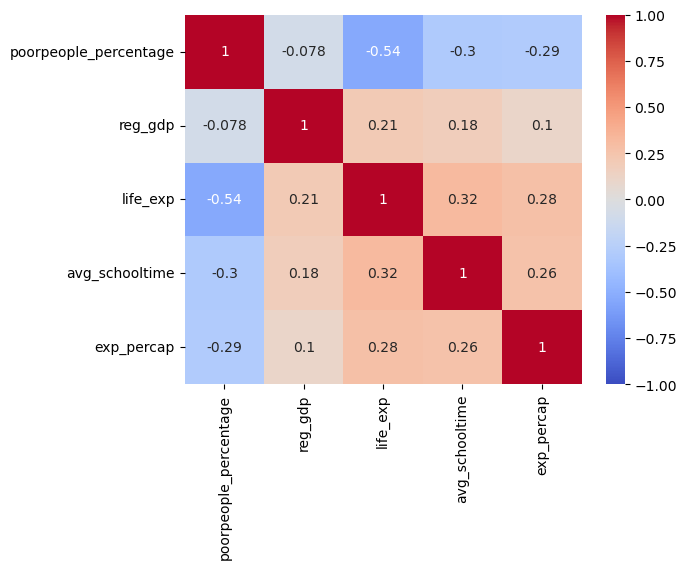

In [58]:
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm')

* Conclusion: The strongest positive relationship is between the avg_schooltime and life_exp observations (0.32), which indicates a medium-strength relationship. There is the strongest negative relationship between the signs life_exp and poorpeople_percentage (-0.54), the relationship is considered high. The negative relationship between reg_gdp and poorpeople_percentage is very weak (-0.078)